In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# load dataset
df = pd.read_csv('../data/train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
# we will only Going to use title and author Columns for Our prediction
df.drop(['id','text'],axis=1,inplace=True)

In [5]:
df.head()

,title,author,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,1


# Data Cleaning

In [6]:
# Check for Null Values
df.isnull().sum()

title      558
author    1957
label        0
dtype: int64

In [7]:
# Drop Null values
df = df.dropna()

In [8]:
# Check for Duplicated Values
df.duplicated().sum()

164

In [9]:
# Drop Duplicated Values
df = df.drop_duplicates(keep='first')

In [10]:
# Merge both Columns Author and Title and Create New Column Content
df['content'] = df['title'] + ' ' + df['author'] 

In [11]:
df.head()

,title,author,label,content
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,Why the Truth Might Get You Fired,Consortiumnews.com,1,Why the Truth Might Get You Fired Consortiumne...
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,1,15 Civilians Killed In Single US Airstrike Hav...
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,1,Iranian woman jailed for fictional unpublished...


# Data Preprocessing

1. Convert text to lowercase
2. tokenization
3. remove stopwords
4. remove punctuation
5. stemming

In [12]:
# import required libaries for preprocessing
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

ps = PorterStemmer()

In [13]:
# Function for entire text transformation

def text_preprocessing(text): 
    # Convert text into lowercase
    text = text.lower()
    
    # Tokenize text into list
    tokenize_text = nltk.word_tokenize(text)
    
    # remove Stopwords
    text_without_stopwords = [i for i in tokenize_text if i not in stopwords.words('english')]
    
    # Remove Punctuation
    text_without_punc = [i for i in text_without_stopwords if i not in string.punctuation]
    
    # fetch only alphanumeric values and apply stemming on that word
    transformed_text = [ps.stem(i) for i in text_without_punc if i.isalnum() == True]
    
    return " ".join(transformed_text)

In [14]:
# Let's Apply This Transformation Function on Our Content Column
df['transformed_content'] = df['content'].apply(text_preprocessing)

In [15]:
# Drop title author and old content column
df = df.drop(['title','author','content'],axis=1)

In [16]:
df.head()

,label,transformed_content
0,1,hous dem aid even see comey letter jason chaff...
1,0,flynn hillari clinton big woman campu breitbar...
2,1,truth might get fire
3,1,15 civilian kill singl us airstrik identifi je...
4,1,iranian woman jail fiction unpublish stori wom...


In [17]:
# let's create new column like number of characters, number of words
df['number_of_characters'] = df['transformed_content'].apply(lambda x:len(x))
df['number_of_words'] = df['transformed_content'].apply(lambda x:len(nltk.word_tokenize(x)))

In [18]:
df.head()

,label,transformed_content,number_of_characters,number_of_words
0,1,hous dem aid even see comey letter jason chaff...,67,12
1,0,flynn hillari clinton big woman campu breitbar...,60,9
2,1,truth might get fire,20,4
3,1,15 civilian kill singl us airstrik identifi je...,59,9
4,1,iranian woman jail fiction unpublish stori wom...,84,12


# Exploratory Data Analysis

<Axes: xlabel='label', ylabel='count'>

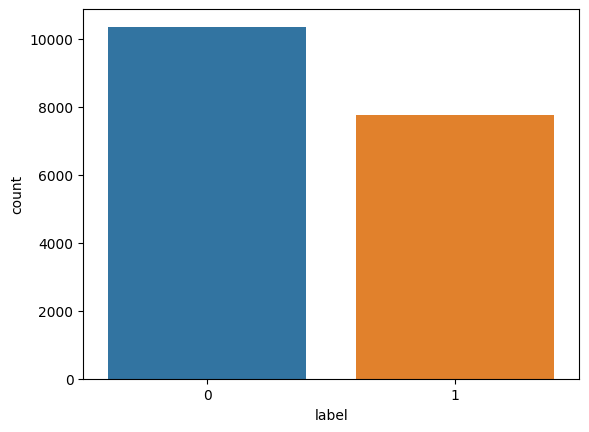

In [19]:
# Check Count of labels
sns.countplot(x='label',data=df)

### **Our Data is Balanced**

In [20]:
# statical info for True news
df[['number_of_characters','number_of_words']][df['label'] == 0].describe()

,number_of_characters,number_of_words
count,10355.000000,10355.000000
mean,71.675519,11.721004
std,14.937684,2.313864
min,23.000000,4.000000
25%,62.000000,10.000000
50%,71.000000,12.000000
75%,81.000000,13.000000
max,146.000000,24.000000


In [21]:
# statical info for fake news
df[['number_of_characters','number_of_words']][df['label'] == 1].describe()

,number_of_characters,number_of_words
count,7766.000000,7766.000000
mean,59.008499,9.361834
std,22.807008,3.557842
min,3.000000,1.000000
25%,45.000000,7.000000
50%,58.000000,9.000000
75%,71.000000,11.000000
max,306.000000,47.000000


<Axes: xlabel='number_of_words', ylabel='Count'>

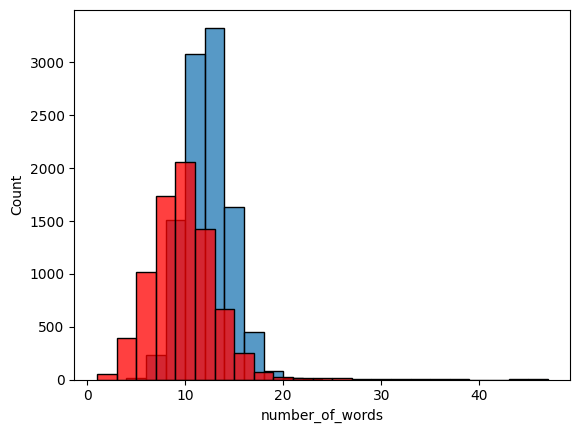

In [22]:
# histplot for Fake News words and True News words
sns.histplot(df['number_of_words'][df['label'] == 0],bins=50,binwidth=2)
sns.histplot(df['number_of_words'][df['label'] == 1],color='red',binwidth=2)

### **Let's make wordcloud of True and Fake News Respectively. so, we can analyze that which words are often used in both type of news.**

In [23]:
# import wordcloud
from wordcloud import WordCloud

# make object of wordcloud
wc = WordCloud(background_color='white',min_font_size=10,width=500,height=500)

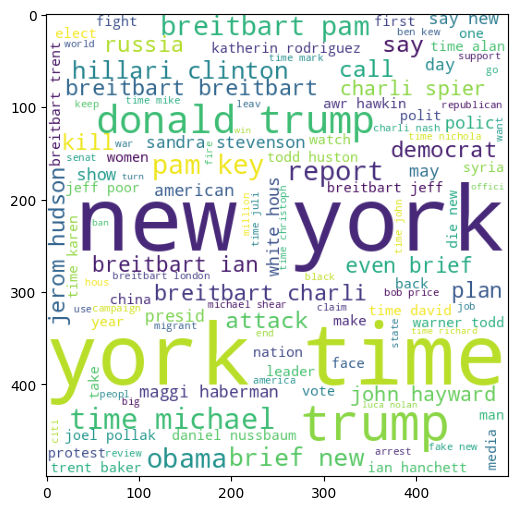

In [24]:
# WordCloud for True News
true_news_wc = wc.generate(df[df['label'] == 0]['transformed_content'].str.cat(sep=" "))
plt.figure(figsize=(8,6))
plt.imshow(true_news_wc)
plt.show()

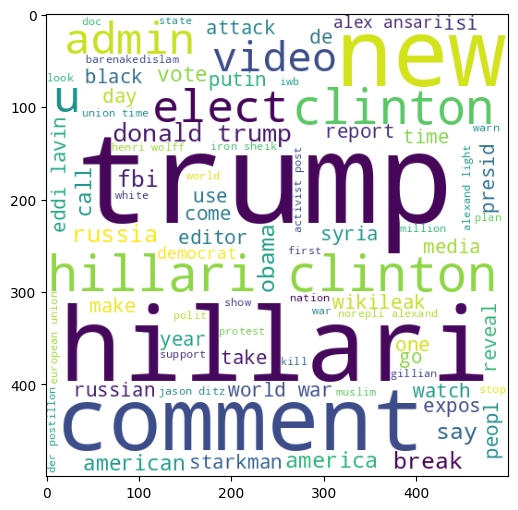

In [25]:
# WordCloud for Fake news
fake_news_wc = wc.generate(df[df['label'] == 1]['transformed_content'].str.cat(sep = " "))
plt.figure(figsize=(8,6))
plt.imshow(fake_news_wc)
plt.show()

### **We can clearly see from this wordcloud that which words are most used in true and fake news.**

### **Let's find specific Count of words.**

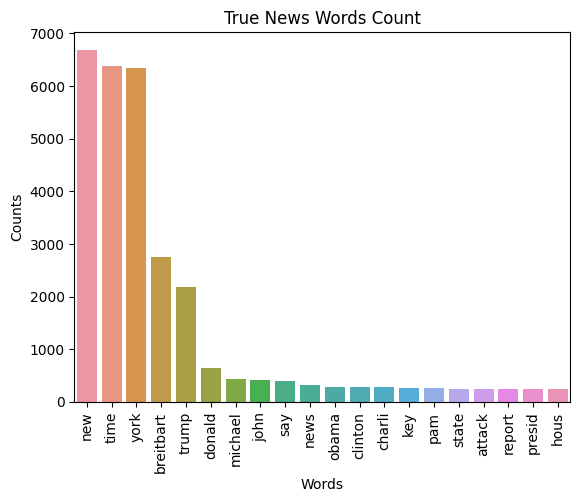

In [26]:
# library for Count Words
from collections import Counter

# create list of True News words
true_news_words_list = df[df['label']==0]['transformed_content'].str.cat(sep = " ").split()

# create DataFrame of that
true_news_words_df = pd.DataFrame(Counter(true_news_words_list).most_common(20))

# Now Let's Plot barplot of this words
sns.barplot(x=true_news_words_df[0],y=true_news_words_df[1])
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('True News Words Count')
plt.show()

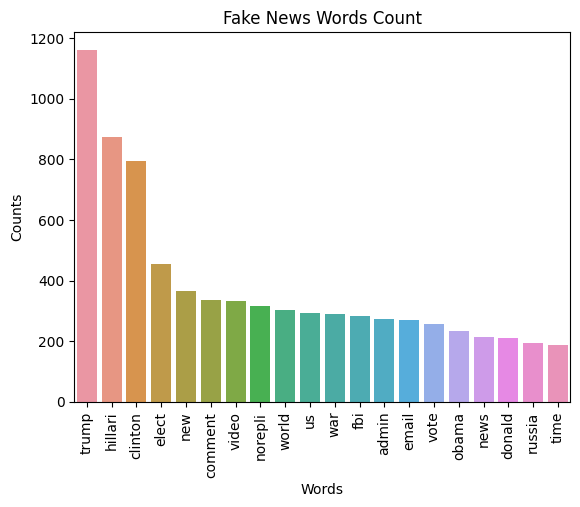

In [27]:
# create list of Fake News words
fake_news_words_list = df[df['label']==1]['transformed_content'].str.cat(sep = " ").split()

# create DataFrame of that
fake_news_words_df = pd.DataFrame(Counter(fake_news_words_list).most_common(20))

# Now Let's Plot barplot of this words
sns.barplot(x=fake_news_words_df[0],y=fake_news_words_df[1])
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Fake News Words Count')
plt.show()

# **Feature Splitting**

In [28]:
# Let's Separate our Input and Output Columns
X = df['transformed_content'].values
y = df['label'].values

In [29]:
# let's do Train Test Split of Our Data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [30]:
# Now Let's Do Vectorization of Transformed Content Using Bag of Words Technique
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# create object of CountVectorizer
cf = CountVectorizer(max_features=5000)

In [31]:
# Convert X_train and Y_train into Vevtors
X_trf =  cf.fit_transform(X).toarray()
X_train = cf.fit_transform(X_train).toarray()
X_test = cf.transform(X_test).toarray()

# **Model Building**

In [ ]:
# import required Models 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.model_selection import GridSearchCV,ShuffleSplit,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score

In [ ]:
# Function to Find Best Model and Parameters of that Model.
def check_model(X,y):
    algos = {
        'lgr':{
            'model':LogisticRegression(),
            'params':{
                'C':[0.1,0.01,1,0.5,2,10,20]
            }
        },
        'mnb':{
            'model':MultinomialNB(),
            'params':{
                
            }
        },
        'bnb':{
            'model':BernoulliNB(),
            'params':{
            
            }
        },
        'gnb':{
            'model':GaussianNB(),
            'params':{
            
            }
        },
    }
    
    score = []
    
    for model_name,config in algos.items():
        cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=42)
        gd = GridSearchCV(estimator=config['model'],param_grid=config['params'],n_jobs=-1,cv=cv)
        gd.fit(X,y)
        score.append({'model_name':model_name,'acc_score':gd.best_score_,'best_params':gd.best_params_})
        
    return pd.DataFrame(score)
        

In [ ]:
# Model's Scores and their Best Parameters
check_model(X_trf,y)

In [ ]:
# Let's Evaluate Model
def model_evaluation(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    train_acc = accuracy_score(y_train,train_pred)
    test_acc = accuracy_score(y_test,test_pred)
    
    train_score = pd.Series({'accuracy_score':accuracy_score(y_train,train_pred),'precision_score':precision_score(y_train,train_pred)})
    test_score = pd.Series({'accuracy_score':accuracy_score(y_test,test_pred),'precision_score':precision_score(y_test,test_pred)})
    scorecard = pd.concat([train_score,test_score],axis=1)
    
    scorecard.columns = ['Train_data','Test_data']
    
    return scorecard

In [ ]:
# Model Evaluation of Logistic Regression
model_evaluation(LogisticRegression(C=10),X_train,X_test,y_train,y_test)

In [ ]:
# Model Evaluation of LogisticRegression
model_evaluation(MultinomialNB(),X_train,X_test,y_train,y_test)

In [ ]:
model_evaluation(BernoulliNB(),X_train,X_test,y_train,y_test)

In [ ]:
model_evaluation(GaussianNB(),X_train,X_test,y_train,y_test)

#### **Logistic Regression is Giving us Best result out of all the model. So, we are going to use Logistic Regression here**

In [ ]:
# Build Final Model
lg = LogisticRegression(C=10)
lg.fit(X_train,y_train)

In [ ]:
p1 = X_test[0]
lg.predict(p1.reshape(1,-1))[0]

In [ ]:
def predict_news(text):
    cleaned_text = text_preprocessing(text)
    ps = pd.Series(cleaned_text)
    final_text = cf.transform(ps).toarray()
    pred = lg.predict(final_text.reshape(1,-1))[0]
    
    if pred == 0:
        print("It's a True News")
    
    else:
        print("It's a Fake News")


In [ ]:
predict_news("jame comey loretta lynch tri influenc statement hillari clinton investig charli spier")

In [ ]:
# Model Evaluation of Logistic Regression
model_evaluation(lg,X_train,X_test,y_train,y_test)

#### **So Finaly Our Model is Created and It's Ready to Predict Now. Thank You.**